# STAT 542 / CS 598: Homework 6
Fall 2019, by Edgar Pino

Due: Monday, Nov 11 by 11:59 PM Pacific Time

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Question 1 [50 Points] Linearly Separable SVM using Quadratic Programming

In [9]:
np.random.seed(1)

In [10]:
p = 2

In [11]:
n = 40

In [12]:
xpos = np.random.normal(0, 1,(n,p))

In [13]:
xneg = np.random.normal(4, 1,(n,p))

In [14]:
x = np.concatenate((xpos, xneg), axis=0)

In [15]:
y = np.concatenate((np.repeat(1, n), np.repeat(-1, n)), axis=0)

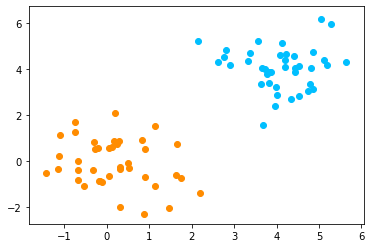

In [16]:
for i in range(len(y)):
    _x = x[i, 0]
    _y = x[i, 1]
    label = y[i]
    color = "darkorange" if label == 1 else "deepskyblue"
    plt.scatter(_x, _y, color=color)

plt.show()

In [17]:
G_Dmat = np.zeros(shape=(3,3))

In [45]:
np.fill_diagonal(G_Dmat, 1)

In [46]:
a_dvec = np.zeros(3)

In [50]:
C_Amat = None

In [52]:
b_bvec = None

In [53]:
meq = 1

In [18]:
def fit(x, y): 
    print('x {} y {}'.format(x.shape, y.shape))
    NUM = x.shape[0]
    DIM = x.shape[1]
    # we'll solve the dual
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

In [21]:
fit(x, y)

x (80, 2) y (80,)
(80,)


TypeError: 'A' must be a 'd' matrix with 80 columns

In [76]:
x.shape

(80, 2)

In [77]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])